In [1]:
import pandas as pd

# Import functions from file
import sys, os
dir_path = os.path.dirname(os.path.realpath('functions.py'))
sys.path.append(str(dir_path)+'/')
from functions import *

### Import google sheet with wget

In [2]:
%%bash
wget "https://docs.google.com/spreadsheets/u/1/d/1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA/export?format=csv&id=1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA&gid=1901126947" -O example.csv

--2018-08-13 13:08:53--  https://docs.google.com/spreadsheets/u/1/d/1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA/export?format=csv&id=1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA&gid=1901126947
Resolving docs.google.com (docs.google.com)... 172.217.4.174, 2607:f8b0:4007:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.4.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘example.csv’

     0K ...                                                    5.44M=0.001s

2018-08-13 13:08:53 (5.44 MB/s) - ‘example.csv’ saved [3343]



In [3]:
!ls

example.csv   Moal.ipynb   requirements.txt	     test.ipynb
functions.py  __pycache__  test_example_data.ipynb
julian.csv    README.md    test_google_sheets.ipynb


Loading csv into pandas dataframe

In [12]:
example = pd.read_csv('example.csv')
example.head()

,Task,Category,Date_Start,Time_Start,Date_End,Time_End,Time_Spent,Expected_Time_Spent,Update_Iterations
0,Edit_abstract,writing,2018-8-13,8:45,2018-8-13,9:07,0:22,0:10,0
1,Register_for_conference,other,2018-8-13,11:33,2018-8-13,11:59,0:26,0:30,0
2,Restore_Visibility,Experiment,2018-8-12,20:00,2018-8-12,22:10,2:10,2:00,0
3,Drug_Claims,Chores,2018-8-13,10:16,2018-8-13,12:40,2:24,2:00,0
4,Credit_Card,Chores,2018-8-13,11:41,2018-8-13,11:57,0:16,0:20,0


### Convert Time_Spent and Expected_Time to decimal format

In [5]:
time = example['Time_Spent'][0]
print(time)

0:22


In [6]:
decimal = convert_mins_to_decimal(str(time))
print(decimal)

0.36


Why when I do the following lambda function on `example_converted['Time_Spent']` does it also affect `example`???

In [13]:
example_converted = example
example_converted['Time_Spent'] = example_converted['Time_Spent'].map(lambda time: convert_mins_to_decimal(str(time)))
example_converted['Expected_Time_Spent'] = example_converted['Expected_Time_Spent'].map(lambda time: convert_mins_to_decimal(str(time)))

In [15]:
example.head()

,Task,Category,Date_Start,Time_Start,Date_End,Time_End,Time_Spent,Expected_Time_Spent,Update_Iterations
0,Edit_abstract,writing,2018-8-13,8:45,2018-8-13,9:07,0.36,0.16,0
1,Register_for_conference,other,2018-8-13,11:33,2018-8-13,11:59,0.43,0.50,0
2,Restore_Visibility,Experiment,2018-8-12,20:00,2018-8-12,22:10,2.16,2.00,0
3,Drug_Claims,Chores,2018-8-13,10:16,2018-8-13,12:40,2.40,2.00,0
4,Credit_Card,Chores,2018-8-13,11:41,2018-8-13,11:57,0.26,0.33,0


In [16]:
example_converted.head()

,Task,Category,Date_Start,Time_Start,Date_End,Time_End,Time_Spent,Expected_Time_Spent,Update_Iterations
0,Edit_abstract,writing,2018-8-13,8:45,2018-8-13,9:07,0.36,0.16,0
1,Register_for_conference,other,2018-8-13,11:33,2018-8-13,11:59,0.43,0.50,0
2,Restore_Visibility,Experiment,2018-8-12,20:00,2018-8-12,22:10,2.16,2.00,0
3,Drug_Claims,Chores,2018-8-13,10:16,2018-8-13,12:40,2.40,2.00,0
4,Credit_Card,Chores,2018-8-13,11:41,2018-8-13,11:57,0.26,0.33,0


### Plot Expected time vs time spent

In [46]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

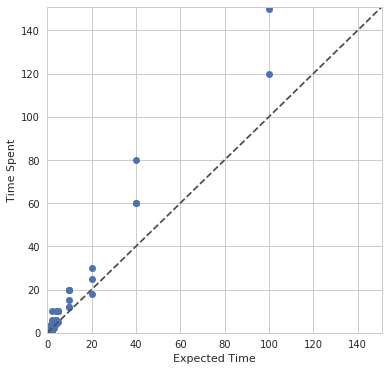

In [45]:
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'], 'o')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Expected Time')
plt.ylabel('Time Spent')

y_max = max(example_converted['Time_Spent'])
x_max = max(example_converted['Expected_Time_Spent'])
if y_max > x_max:
    lim = y_max + 1
else:
    lim = x_max + 1
ax.set(xlim=(0, lim), ylim=(0, lim))
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

plt.show()

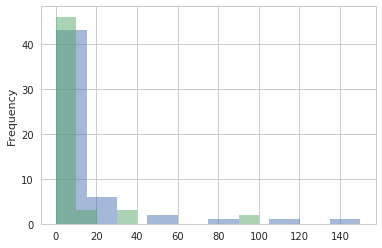

In [52]:
# example data
example_converted['Time_Spent'].plot.hist(alpha=0.5)
example_converted['Expected_Time_Spent'].plot.hist(alpha=0.5)
plt.show()

In [64]:
import seaborn as sns

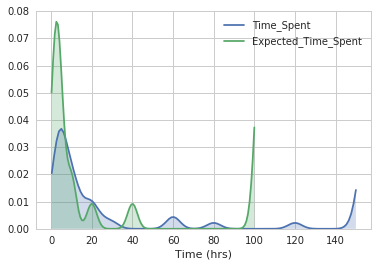

In [82]:
ax = sns.kdeplot(example_converted['Time_Spent'], cut=0, shade=True)
ax = sns.kdeplot(example_converted['Expected_Time_Spent'], cut=0, shade=True)
plt.xlabel('Time (hrs)')
plt.show()

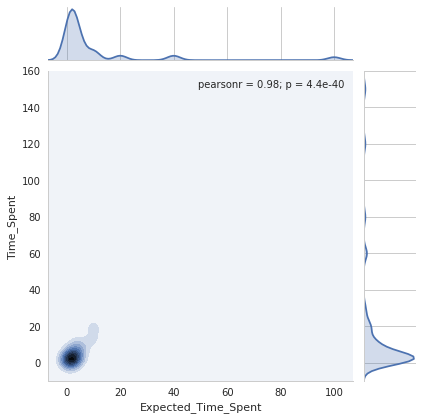

In [89]:
sns.jointplot(x="Expected_Time_Spent", y="Time_Spent", data=example_converted, kind="kde")
plt.show()

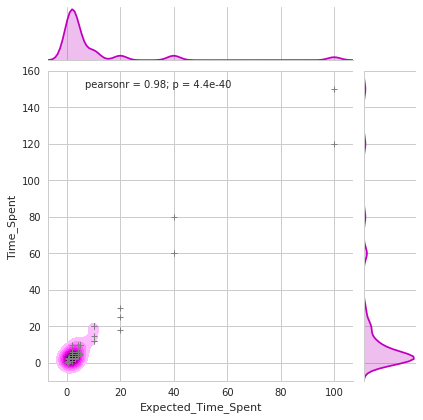

In [97]:
g = sns.jointplot(x="Expected_Time_Spent", y="Time_Spent", data=example_converted, kind="kde", color="m")
g.plot_joint(plt.scatter, c="grey", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Expected_Time_Spent", "Time_Spent");

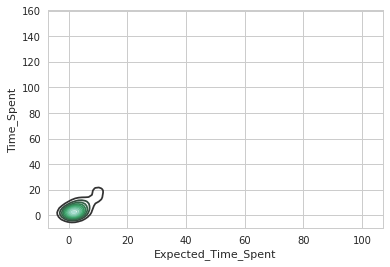

In [69]:
ax = sns.kdeplot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'])

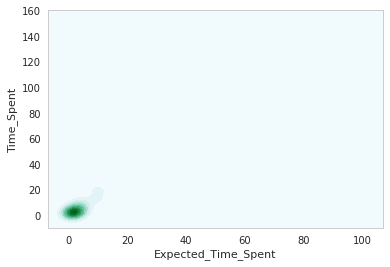

In [70]:
ax = sns.kdeplot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'], shade=True)

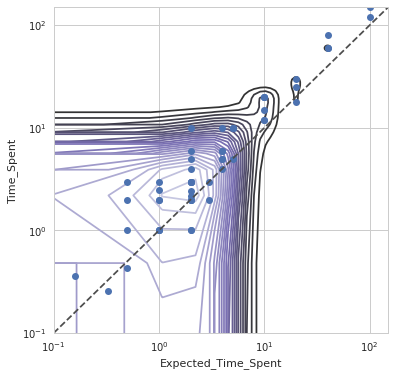

In [79]:
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Expected Time')
plt.ylabel('Time Spent')
# ax = sns.kdeplot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'])
ax = sns.kdeplot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'], n_levels=30, cmap="Purples_d")

y_max = max(example_converted['Time_Spent'])
x_max = max(example_converted['Expected_Time_Spent'])
if y_max > x_max:
    lim = y_max + 1
else:
    lim = x_max + 1
ax.set(xlim=(0.1, lim), ylim=(0.1, lim))
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

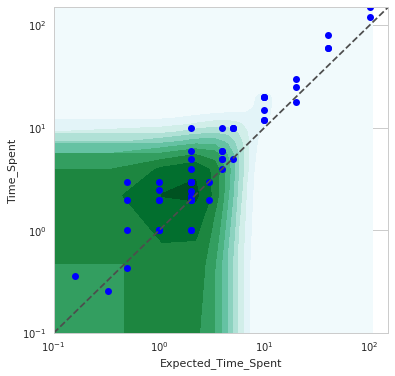

In [78]:
f, ax = plt.subplots(figsize=(6, 6))
# plt.plot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'], 'bo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Expected Time')
plt.ylabel('Time Spent')
ax = sns.kdeplot(example_converted['Expected_Time_Spent'], example_converted['Time_Spent'], shade=True)

y_max = max(example_converted['Time_Spent'])
x_max = max(example_converted['Expected_Time_Spent'])
if y_max > x_max:
    lim = y_max + 1
else:
    lim = x_max + 1
ax.set(xlim=(0.1, lim), ylim=(0.1, lim))
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")